## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/home/nurik/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Download the dataset

In [2]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv'
# work with only 2021 and earlier data as the challenge rules suggest
df = pd.read_csv(url)
df = df[df.JAHR<2022]

In [3]:
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
12,Alkoholunfälle,insgesamt,2021,Summe,383.0,430.0,NaN,-10.93,NaN
13,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
14,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
15,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
16,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


## Visualize historically the number of accidents per category

/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nurik/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/nurik/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/nurik/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future 

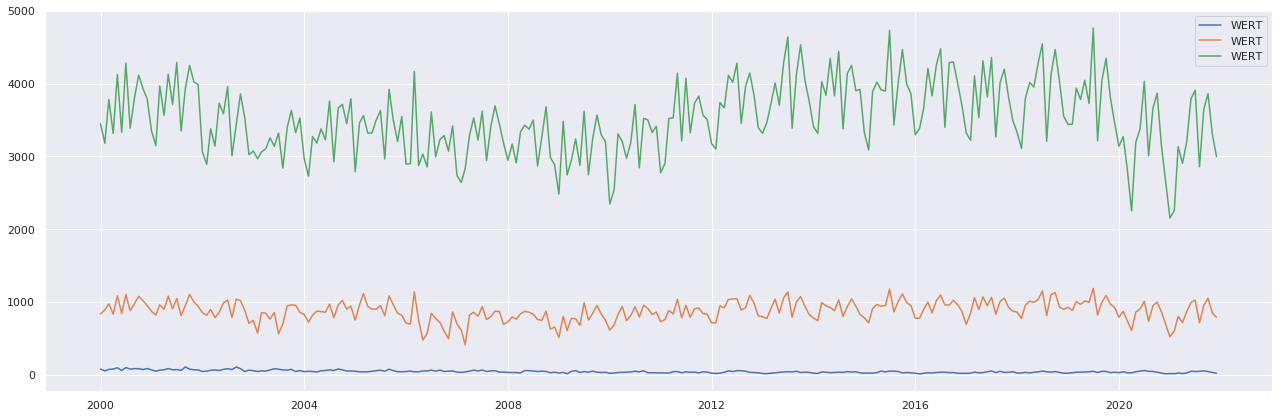

In [4]:
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')
plt.figure(figsize=(22,7))
plt.plot('MONAT_DATETIME','WERT',data=df[df.MONAT!='Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Alkoholunfälle'].sort_values(by='MONAT_DATETIME'))
plt.plot('MONAT_DATETIME','WERT',data=df[df.MONAT!='Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Fluchtunfälle'].sort_values(by='MONAT_DATETIME'))
plt.plot('MONAT_DATETIME','WERT',data=df[df.MONAT!='Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Verkehrsunfälle'].sort_values(by='MONAT_DATETIME'))
plt.legend(loc='best')
plt.show()

/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


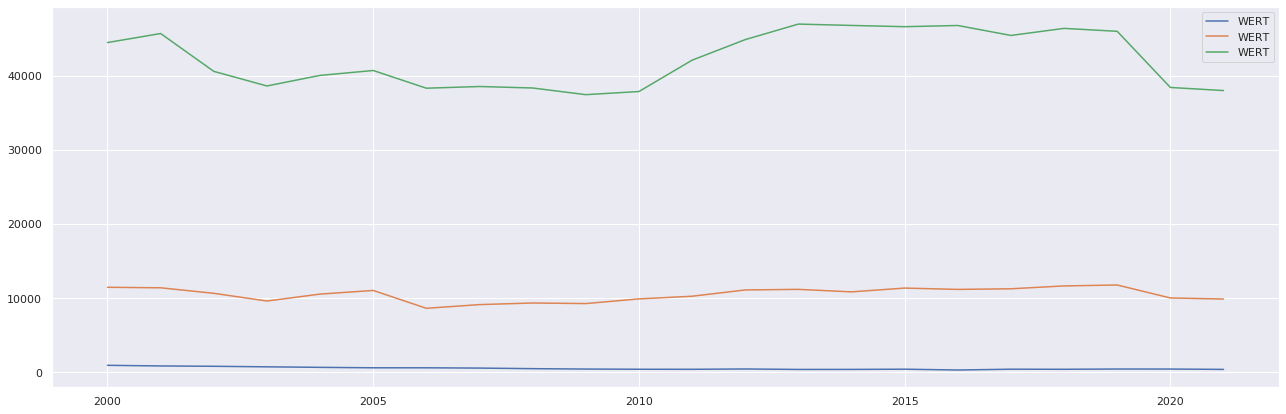

In [5]:
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')
plt.figure(figsize=(22,7))
plt.plot('JAHR','WERT',data=df[df.MONAT == 'Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Alkoholunfälle'].sort_values(by='JAHR'))
plt.plot('JAHR','WERT',data=df[df.MONAT == 'Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Fluchtunfälle'].sort_values(by='JAHR'))
plt.plot('JAHR','WERT',data=df[df.MONAT == 'Summe'][df.AUSPRAEGUNG=='insgesamt'][df['MONATSZAHL']=='Verkehrsunfälle'].sort_values(by='JAHR'))
plt.legend(loc='best')
plt.show()

In [6]:
# Visualize a monthly dependence as a heatmap
plt.figure(figsize=(10,10))
#for year in sorted(df.JAHR.unique().to_list()):
data_for_heatmap = df[df['MONATSZAHL']=='Alkoholunfälle'][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe'].sort_values(by='MONAT_DATETIME')[['JAHR','WERT','MONAT_DATETIME']]
matrix = data_for_heatmap['WERT'].values.reshape(len(data_for_heatmap.JAHR.unique()),-1)

/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<Figure size 720x720 with 0 Axes>

In [7]:
df['MONAT_DATETIME'] = pd.to_datetime(df[df.MONAT != 'Summe'].MONAT,format='%Y%m')

In [8]:
df.MONATSZAHL.unique()

array(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], dtype=object)

/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


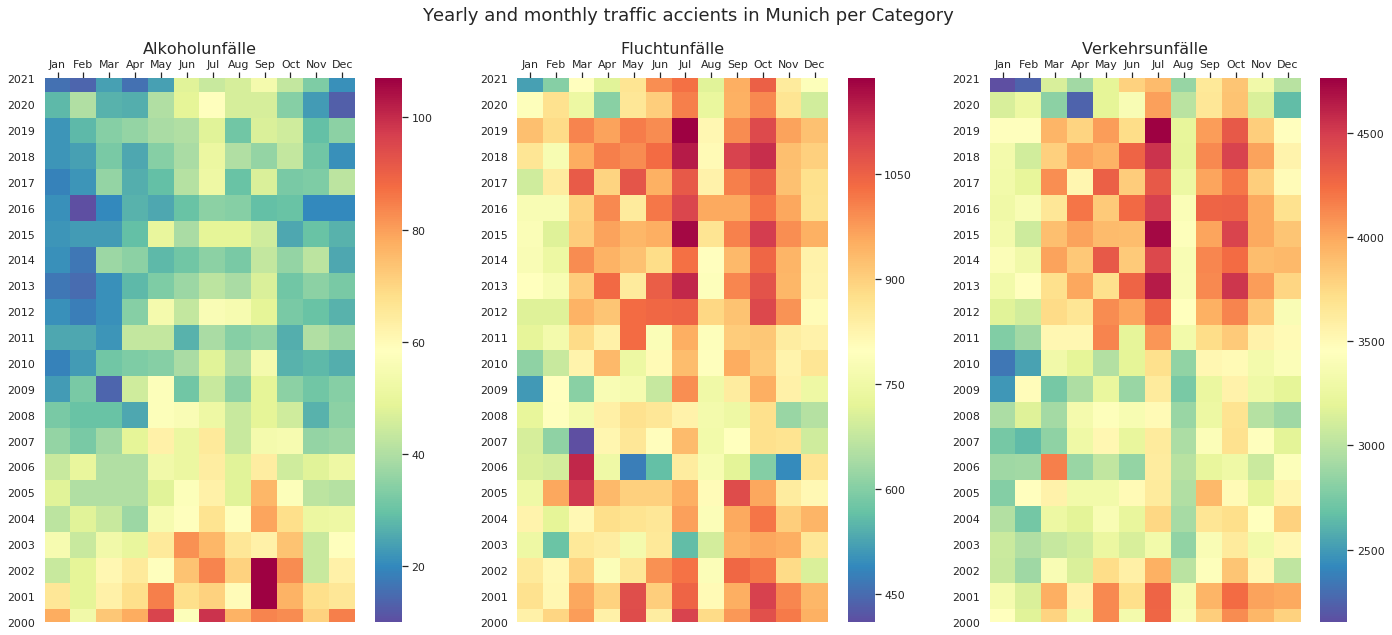

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(24,10))
fig.suptitle('Yearly and monthly traffic accients in Munich per Category', fontsize=18)

for idx, category in enumerate(df.MONATSZAHL.unique()):
    data_for_heatmap = df[df['MONATSZAHL']==category][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe'].sort_values(by='MONAT_DATETIME')[['JAHR','WERT','MONAT_DATETIME']]
    matrix = data_for_heatmap['WERT'].values.reshape(len(data_for_heatmap.JAHR.unique()),-1)
    month_names=data_for_heatmap['MONAT_DATETIME'].dt.month_name().str[:3].unique().tolist()
    years=data_for_heatmap['MONAT_DATETIME'].dt.year.unique().tolist()
    sns.heatmap(ax=axs[idx], data=matrix, cmap='Spectral_r', square=True, xticklabels=month_names, yticklabels=years)
    axs[idx].xaxis.tick_top()
    axs[idx].invert_yaxis()
    axs[idx].set_title(category, fontsize=16)

In [39]:
data_for_heatmap.

,JAHR,WERT,MONAT_DATETIME
286,2000,78.0,2000-01-01
287,2000,53.0,2000-02-01
288,2000,73.0,2000-03-01
289,2000,78.0,2000-04-01
290,2000,96.0,2000-05-01
...,...,...,...
20,2021,46.0,2021-08-01
21,2021,54.0,2021-09-01
22,2021,43.0,2021-10-01
23,2021,33.0,2021-11-01


In [7]:
fig = px.imshow(df[df.MONAT == 'Summe'].sort_values(by='JAHR'), x="JAHR", y="WERT", color='MONATSZAHL',markers=True)
fig.show()

TypeError: imshow() got an unexpected keyword argument 'color'

In [ ]:
df[df['MONATSZAHL']=='Alkoholunfälle']

In [ ]:
df.MONAT